# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


Generate the data

In [2]:
# Generate points from 0 to 3
x_0, x_n, N = 0, 3, 100
xnum = np.linspace(x_0, x_n, N)

# Normal distribution
mu, sigma = 0, 0.1
eps_num = [np.random.normal(mu, sigma) for x in xnum]

# Sine function
def f(x):
    return x*np.sin(x)

# Needed function
def y(x):
    return f(x) + eps_num

Plot the data

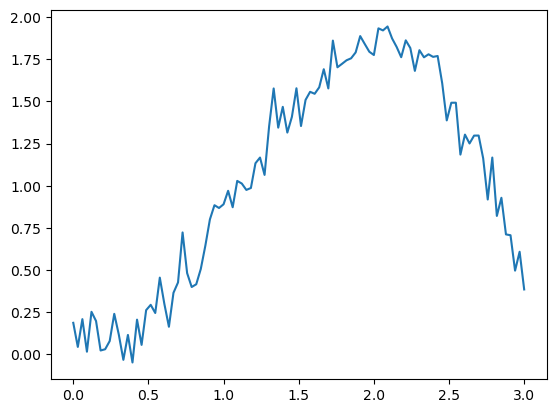

In [3]:
plt.plot(xnum, y(xnum))

We split the data into training, cross-validation, and test set using `sklearn.model_selection.train_test_split`. Since `sklearn` only splits the data into two and not three like we need, we can split the data into two first, and split it again. 

In [59]:
# Import splitter
from sklearn.model_selection import train_test_split

# Split the data 50-50
x_train, x_half, y_train, y_half = train_test_split(xnum, y(xnum), train_size=0.5, random_state=0) # train_size=0.5 kasi kalahati, random_state=0 yun yung seed sa splitting

# Split the data again to 25-25
x_cross, x_test, y_cross, y_test = train_test_split(x_half,  y_half, train_size=0.5, random_state=0) 

We see that the plot looks like a mess since the arrays are jumbled.

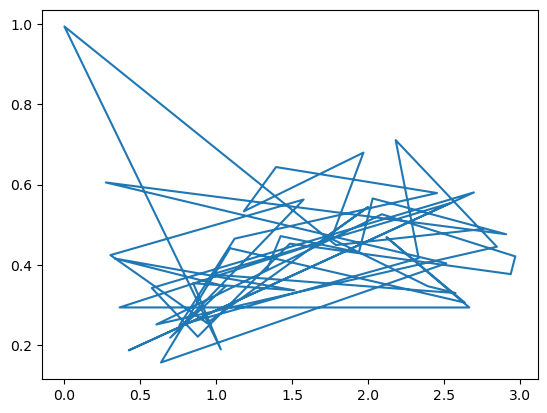

In [60]:
plt.plot(x_train, y_train)

We can make unjumble it using `pandas` and sort the x-axis data `x_train` in an ascending order.

In [82]:
import pandas as pd

trains = np.array([x_train, y_train])
train_df = pd.DataFrame(trains.T, columns=['x_data', 'y_data'])
train_df

,x_data,y_data
0,2.757576,0.489169
1,1.787879,0.449096
2,0.000000,0.993917
3,1.030303,0.188990
4,0.848485,0.353922
5,1.515152,0.336306
6,0.333333,0.415451
7,1.060606,0.346016
8,0.696970,0.218110
9,1.575758,0.562593


In [89]:
train_df.groupby('x_data').size().sort_values(ascending=True)

x_data
0.000000    1
1.757576    1
1.787879    1
1.939394    1
1.969697    1
2.000000    1
2.030303    1
2.090909    1
2.121212    1
2.181818    1
2.333333    1
2.393939    1
2.454545    1
2.515152    1
2.545455    1
2.575758    1
2.636364    1
2.666667    1
2.696970    1
2.757576    1
2.848485    1
2.909091    1
1.727273    1
1.575758    1
1.515152    1
1.484848    1
0.272727    1
0.303030    1
0.333333    1
0.363636    1
0.424242    1
0.575758    1
0.606061    1
0.636364    1
0.696970    1
0.757576    1
2.939394    1
0.848485    1
0.939394    1
0.969697    1
1.030303    1
1.060606    1
1.090909    1
1.121212    1
1.181818    1
1.333333    1
1.393939    1
1.424242    1
0.878788    1
2.969697    1
dtype: int64

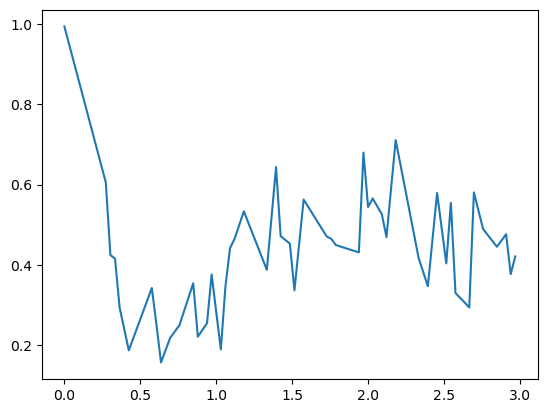

In [91]:
train_sort = train_df.groupby('x_data').max()
plt.plot(train_sort)

In [ ]:
train_df = (
    train_df.assign(key=train_df.groupby('y_data')['x_data'].transform('max'))
        .sort_values(['key', 'c2', 'c1'], ascending=False, ignore_index=True)
        .drop(columns=['key'])
)

We then get the polynomial fits from $d=0$ to $d=14$. 

In [5]:
# Start and end of degree
d0, dn = 0, 14

# Fitting of polynomial
polyfits_train = [np.polyfit(x_train, y_train, i) for i in range(d0, dn+1)]

# Using the polynomial fits and plot
polys_train = [np.poly1d(polyfits_train[i])(x_train) for i in range(d0, dn+1)]

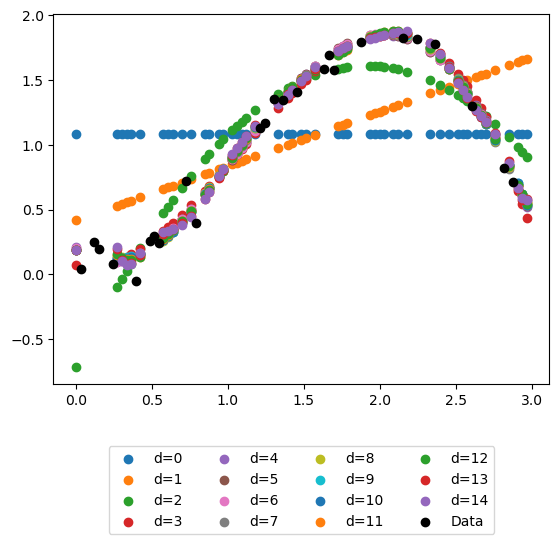

In [6]:
# Plotting the function
for i in range(d0, dn+1):
    plt.scatter(x_train, polys_train[i], label='d={degree}'.format(degree = i))
plt.scatter(x_cross, y_cross, color='k', label='Data')
plt.legend(loc='upper center', ncol=4, fancybox=True, bbox_to_anchor=(0.5,-0.15))

In [ ]:
# Start and end of degree
d0, dn = 0, 14

# Fitting of polynomial

polyfits_train = [np.polyfit(x_train, y_train, i) for i in range(d0, dn+1)]

# Using the polynomial fits and plot
polys_train = [np.poly1d(polyfits_train[i])(x_train) for i in range(d0, dn+1)]

To get the rms error of the cross-validation `y_cross` and our obtained fits in `polys` for cross-validation, we need to use `sklearn.metrics.mean_squared_error`.

In [7]:
# Import from sklearn
from sklearn.metrics import mean_squared_error

# Fitting of polynomial
# polyfits_cross = [np.polyfit(x_cross, y_cross, i) for i in range(d0, dn+1)]

# Using the polynomial fits and plot
polys_cross = [np.poly1d(polyfits_train[i])(x_cross) for i in range(d0, dn+1)]

# Get the rms errors of cross-validation and their fits
rmses_cross = [mean_squared_error(y_cross, polys_cross[i]) for i in range(d0, dn+1)]

# Get the rms errors of training and their fits 
rmses_train = [mean_squared_error(y_train, polys_train[i]) for i in range(d0, dn+1)]

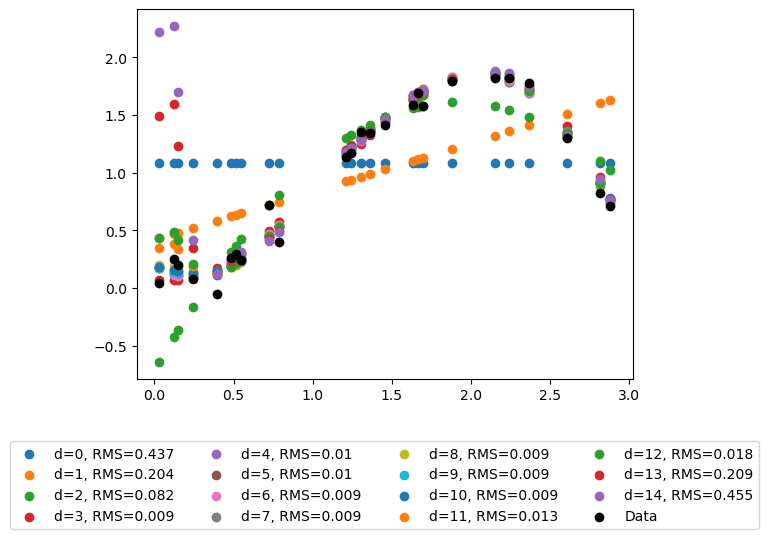

In [8]:
for i in range(d0, dn+1):
    plt.scatter(x_cross, polys_cross[i], label='d={degree}, RMS={rms}'.format(degree = i, rms=round(rmses_cross[i], 3)))
plt.scatter(x_cross, y_cross, color='k', label='Data')
plt.legend(loc='upper center', ncol=4, fancybox=True, bbox_to_anchor=(0.5,-0.15))

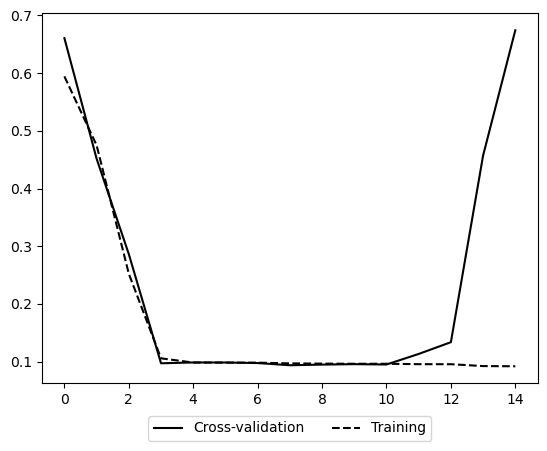

In [9]:
plt.plot(np.sqrt(rmses_cross), label='Cross-validation', color='k', linestyle='-')
plt.plot(np.sqrt(rmses_train), label='Training', color='k', linestyle='--')
plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.07))


We can also get the rms errors for the test set. 

In [10]:
# Fitting of polynomial
#polyfits_test = [np.polyfit(x_test, y_test, i) for i in range(d0, dn+1)]

# Using the polynomial fits and plot
polys_test = [np.poly1d(polyfits_train[i])(x_test) for i in range(d0, dn+1)]

# Get the rms errors of cross-validation and their fits
rmses_test = [mean_squared_error(y_test, polys_test[i]) for i in range(d0, dn+1)]

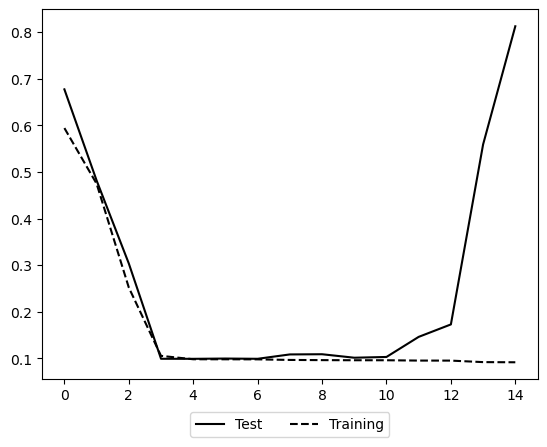

In [11]:
plt.plot(np.sqrt(rmses_test), label='Test', color='k', linestyle='-')
plt.plot(np.sqrt(rmses_train), label='Training', color='k', linestyle='--')
plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.07))

Let's try making this into a neat function. However, we're only taking 

In [12]:
def mean_error(func, x_list):
    # Normal distribution
    mu, sigma = 0, 0.1
    eps_num = [np.random.normal(mu, sigma) for x in x_list]

    def y(x_list):
        return func(x_list) + eps_num

    # Degree range 
    deglist = [2, 3, 5, 10, 14]

    # Split the data 50-50
    x_train, x_half, y_train, y_half = train_test_split(x_list, y(x_list), train_size=0.5, random_state=0) # training
    x_cross, x_test, y_cross, y_test = train_test_split(x_half,  y_half, train_size=0.5, random_state=0) # cross-validation and test

    # Fitting of polynomial train
    polyfits_train = [np.polyfit(x_train, y_train, i) for i in deglist]
    polys_train = [np.poly1d(polyfits_train[i])(x_train) for i in deglist]

    # Fitting of polynomial cross
    #polyfits_cross = [np.polyfit(x_cross, y_cross, i) for i in deglist]
    polys_cross = [np.poly1d(polyfits_train[i])(x_cross) for i in deglist]

    # Using the polynomial fits and plot
    #polyfits_test = [np.polyfit(x_test, y_test, i) for i in deglist]
    polys_test = [np.poly1d(polyfits_train[i])(x_test) for i in deglist]

    # Get the rms errors of cross-validation and their fits
    rmses_cross = [mean_squared_error(y_cross, polys_cross[i]) for i in deglist]
    rmses_train = [mean_squared_error(y_train, polys_train[i]) for i in deglist]
    rmses_test = [mean_squared_error(y_test, polys_test[i]) for i in deglist]

    # Plots
    plt.figure(figsize=[7,20])
    ## Plot of the data with the fits
    plt.subplot(1, 3, 1)
    plt.title('Polynomial fits of the training data')
    plt.scatter(x_list, y(x_list), color='k', label='Data')
    for i in deglist:
        plt.scatter(x_train, polys_train[i], label='d={degree}'.format(degree = i))
    ## Plot of RMS between cross-validation and training 
    plt.subplot(1, 3, 2)
    plt.title('RMS error bet. cross-validation and training data')
    plt.plot(deglist, np.sqrt(rmses_cross), label='Test', color='k', linestyle='-')
    plt.plot(deglist, np.sqrt(rmses_train), label='Training', color='k', linestyle='--')
    plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.07))
    ## Plot of RMS between test and training
    plt.subplot(1, 3, 2)
    plt.title('RMS error bet. test and training data')
    plt.plot(deglist, np.sqrt(rmses_test), label='Test', color='k', linestyle='-')
    plt.plot(deglist, np.sqrt(rmses_train), label='Training', color='k', linestyle='--')
    plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.07))

    return None

In [57]:
def mean_error(func, x_list):
    # Normal distribution
    mu, sigma = 0, 0.1
    eps_num = [np.random.normal(mu, sigma) for x in x_list]

    def y(x_list):
        return func(x_list) + eps_num

    # Degree range 
    d0, dn = 0, 14

    # Split the data 50-50
    x_train, x_half, y_train, y_half = train_test_split(x_list, y(x_list), train_size=0.5, random_state=0) # training
    x_cross, x_test, y_cross, y_test = train_test_split(x_half,  y_half, train_size=0.5, random_state=0) # cross-validation and test

    # Fitting of polynomial train
    polyfits_train = [np.polyfit(x_train, y_train, i) for i in range(d0, dn+1)]
    polys_train = [np.poly1d(polyfits_train[i])(x_train) for i in range(d0, dn+1)]
    polys_cross = [np.poly1d(polyfits_train[i])(x_cross) for i in range(d0, dn+1)]
    polys_test = [np.poly1d(polyfits_train[i])(x_test) for i in range(d0, dn+1)]

    # Get the rms errors of cross-validation and their fits
    rmses_cross = [mean_squared_error(y_cross, polys_cross[i]) for i in range(d0, dn+1)]
    rmses_train = [mean_squared_error(y_train, polys_train[i]) for i in range(d0, dn+1)]
    rmses_test = [mean_squared_error(y_test, polys_test[i]) for i in range(d0, dn+1)]

    # Plots
    deglist = [2, 3, 7, 10, 14]
    plt.figure(figsize=[20, 5])
    ## Plot of the data with the fits
    plt.subplot(1, 3, 1)
    plt.title('Polynomial fits of the training data')
    plt.scatter(x_list, y(x_list), color='k', label='Data')
    for i in deglist:
        plt.scatter(x_train, polys_train[i], label='d={degree}'.format(degree = i))
    plt.legend(loc='upper center', ncol=3, fancybox=True, bbox_to_anchor=(0.5,-0.07))
    ## Plot of RMS between cross-validation and training 
    plt.subplot(1, 3, 2)
    plt.title('RMS error bet. cross-validation and training data')
    plt.plot(np.sqrt(rmses_train), label='Training', color='k', linestyle='solid')
    plt.plot(np.sqrt(rmses_cross), label='Cross-validation', color='k', linestyle='dashed')
    plt.plot(np.sqrt(rmses_test), label='Test', color='k', linestyle='dotted')
    plt.legend(loc='upper center', ncol=2, fancybox=True, bbox_to_anchor=(0.5,-0.07))

    return None

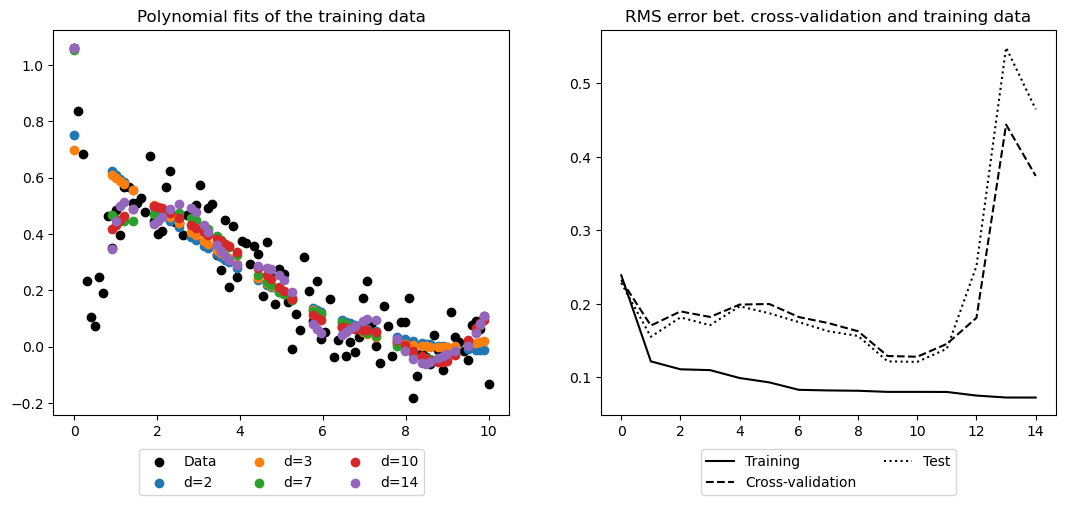

In [58]:
def func_new(x):
    return x**2*np.exp(-x) + np.exp(-10*x**2)

x_new = np.linspace(0,10,100)

mean_error(func_new, x_new)

In [13]:
x_new = np.linspace(0,10,100)
# Normal distribution
mu, sigma = 0, 0.1
eps_num = [np.random.normal(mu, sigma) for x in x_new]

def func_new(x):
    return x**2*np.exp(-x) + np.exp(-0*x**2)

def y(x_list):
    return func_new(x_list) + eps_num

# Degree range 
deglist = [2, 3, 5, 10, 14]

# Split the data 50-50
x_train, x_half, y_train, y_half = train_test_split(x_new, y(x_new), train_size=0.5, random_state=0) # training
x_cross, x_test, y_cross, y_test = train_test_split(x_half,  y_half, train_size=0.5, random_state=0) # cross-validation and test

# Fitting of polynomial train
polyfits_train = [np.polyfit(x_train, y_train, deglist[i]) for i in range(len(deglist))]
#polys_train = [np.poly1d(polyfits_train[i])(x_train) for i in deglist]
polys_train = []
for i in deglist:
    fxn = np.poly1d(polyfits_train[i])(x_train)
    polys_train.append(fxn)
polys_train

IndexError: list index out of range

In [25]:
x_new = np.linspace(0,10,100)
# Normal distribution
mu, sigma = 0, 0.1
eps_num = [np.random.normal(mu, sigma) for x in x_new]

def func_new(x):
    return x**2*np.exp(-x) + np.exp(-0*x**2)

def y(x_list):
    return func_new(x_list) + eps_num

# Degree range 
deglist = [2, 3, 5, 10, 14]

# Split the data 50-50
x_train, x_half, y_train, y_half = train_test_split(x_new, y(x_new), train_size=0.5, random_state=0) # training
x_cross, x_test, y_cross, y_test = train_test_split(x_half,  y_half, train_size=0.5, random_state=0) # cross-validation and test

# Fitting of polynomial train
polyfits_train = [np.polyfit(x_train, y_train, deg) for deg in deglist]
# polys_train = [np.poly1d(polyfits_train[i])(x_train) for deg in deglist]
# polys_train = []
# for i in deglist:
#     fxn = np.poly1d(polyfits_train[i])(x_train)
#     polys_train.append(fxn)
np.shape(polyfits_train[4])

(15,)

In [19]:
# polyfits_train = [np.polyfit(x_train, y_train, deglist[i]) for i in deglist]
polyfits_train = []
for deg in deglist: polyfits_train.append(np.polyfit(x_train, y_train, deg))
polyfits_train

[array([ 8.86570944e-04, -6.68051882e-02,  1.52658497e+00]),
 array([ 0.00560563, -0.08570324,  0.29880342,  1.16821679]),
 array([ 2.56907200e-05, -2.26554223e-03,  4.42308674e-02, -3.22927774e-01,
         8.26417449e-01,  8.79092566e-01]),
 array([ 1.38335762e-06, -7.44084020e-05,  1.74481777e-03, -2.32997095e-02,
         1.93936451e-01, -1.03380769e+00,  3.48474788e+00, -7.02050906e+00,
         7.32533379e+00, -2.46676509e+00,  9.02113955e-01]),
 array([ 4.07498102e-08, -3.15769232e-06,  1.09878367e-04, -2.26795185e-03,
         3.08973483e-02, -2.92506839e-01,  1.97319385e+00, -9.56875340e+00,
         3.32327066e+01, -8.13425316e+01,  1.35948520e+02, -1.46520253e+02,
         9.08611978e+01, -2.38432307e+01,  9.02454034e-01])]

In [15]:
deglist = [2, 3, 5, 10, 14]

for deg in deglist: print(deg)

2
3
5
10
14


In [16]:
for i in range(len(deglist)): print(deglist[i])

2
3
5
10
14


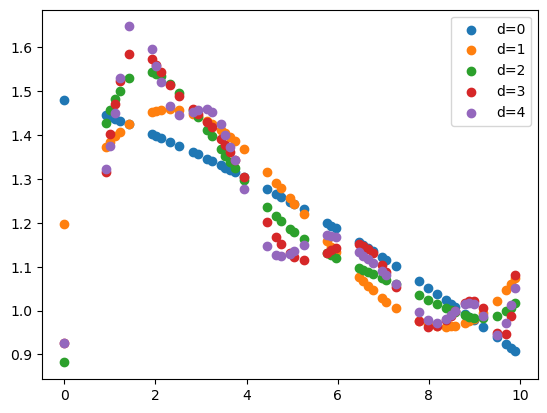

In [ ]:
for i in range(5):
    plt.scatter(x_train, np.poly1d(polyfits_train[i])(x_train), label='d={degree}'.format(degree=i))
plt.legend()

In [ ]:
def func_new(x):
    return x**2*np.exp(-x) + np.exp(-10*x**2)

x_new = np.linspace(0,10,100)

mean_error(func_new, x_new)

IndexError: list index out of range

In [ ]:
deglist = [2, 3, 5, 9, 14]
[i**2 for i in deglist]

[4, 9, 25, 81, 196]